In [1]:
import pandas as pd
df = pd.read_csv('BankChurners.csv') 


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read in the CSV file
data = pd.read_csv('BankChurners.csv')

# rename columns
data = data.rename(columns={
    'CLIENTNUM': 'ID',})
# drop columns
data = data.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
])

# print the resulting dataframe
print(data.head())

          ID     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

In [4]:
#missing value
data.isnull().mean()


ID                          0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

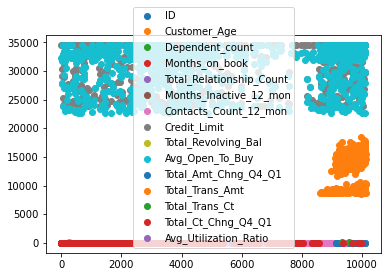

In [5]:
# 选择数值列
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data_numerical = data[numerical_cols]

# 检测并标记离群点 Boxplot Detection
Q1 = data_numerical.quantile(0.25)
Q3 = data_numerical.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = {}
for col in numerical_cols:
    col_outliers = data_numerical[(data_numerical[col] < lower_bound[col]) | (data_numerical[col] > upper_bound[col])]
    outliers[col] = col_outliers

# 可视化离群点 Visualize Outliers
for col in numerical_cols:
    plt.scatter(outliers[col].index, outliers[col][col], label=col)

plt.legend()
plt.show()


outlier_count = (data_numerical < lower_bound) | (data_numerical > upper_bound)
outlier_count = outlier_count.sum(axis=1)

# remove rows with 4 or more outliers
data_clean = data[outlier_count < 4]

In [6]:
#数据特征
numeric_features = data.select_dtypes(include=[np.number])
print(numeric_features.columns)
#类别特征
categorical_features = data.select_dtypes(include=[np.object])
print(categorical_features.columns)

Index(['ID', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


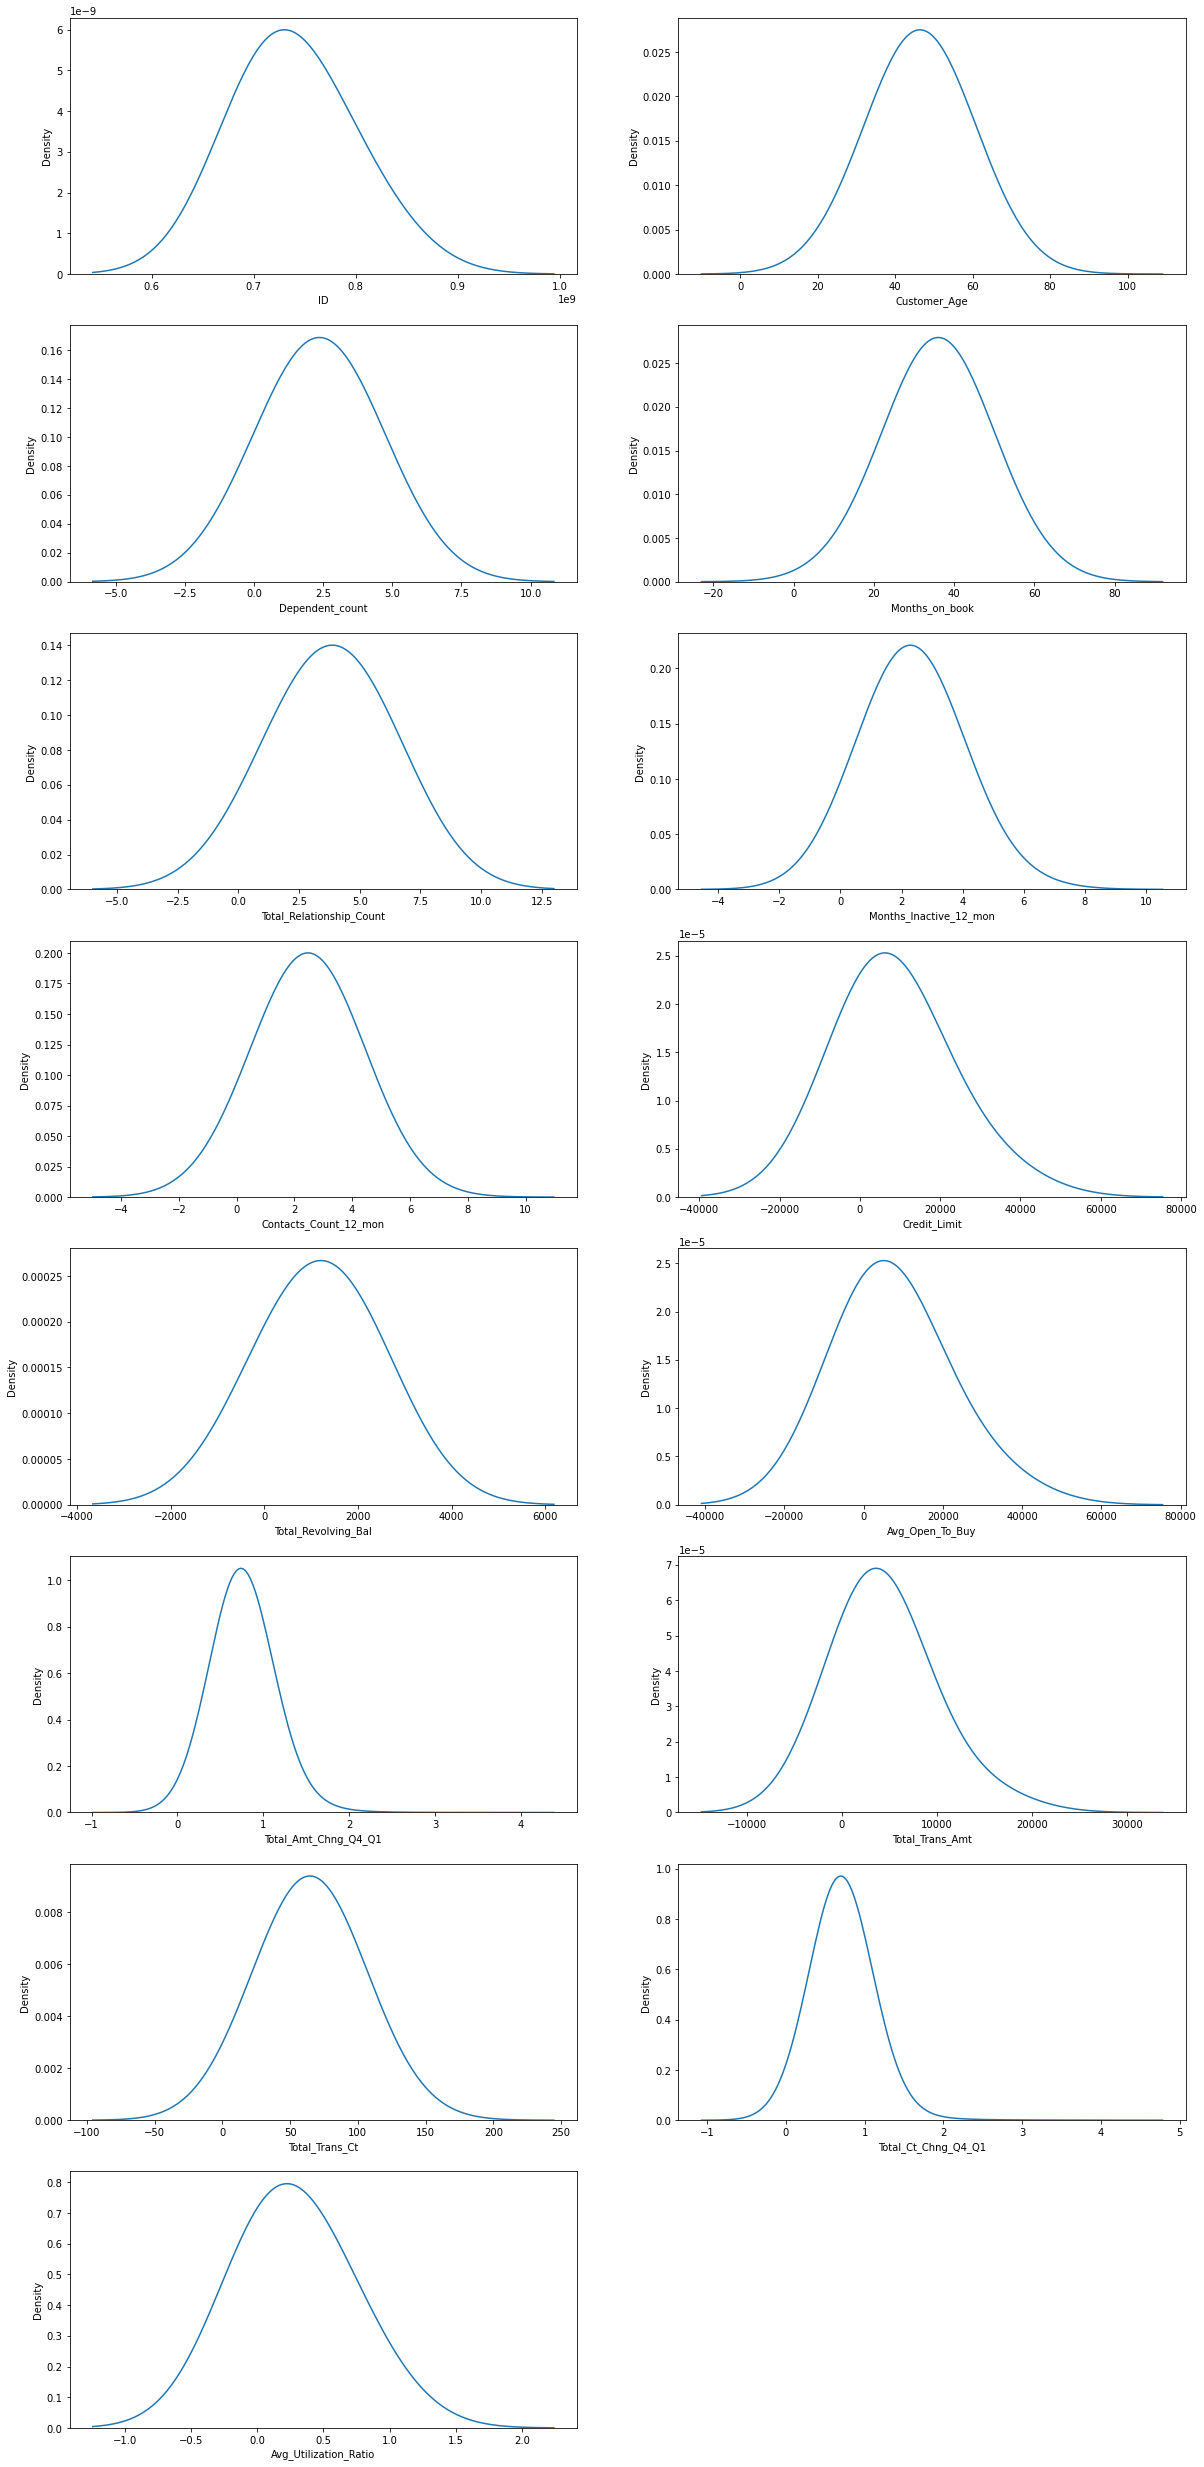

In [7]:
plt.figure(figsize=(20,50))
col = list(numeric_features.columns)
for i in range(1,len(numeric_features.columns)+1):
    ax=plt.subplot(9,2,i) 
    sns.kdeplot(data[col[i-1]],bw=1.5)
    plt.xlabel(col[i-1])
plt.show()

<AxesSubplot:ylabel='Attrition_Flag'>

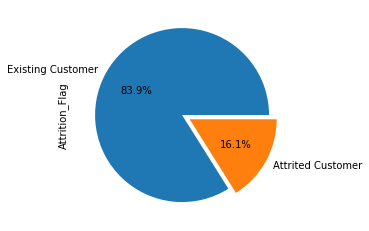

In [8]:
data['Attrition_Flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

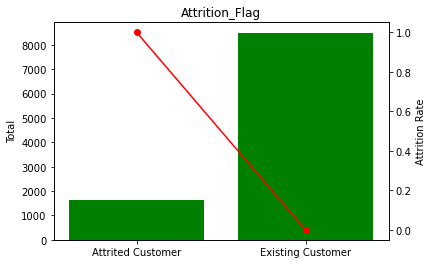

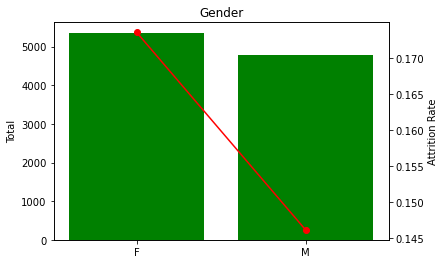

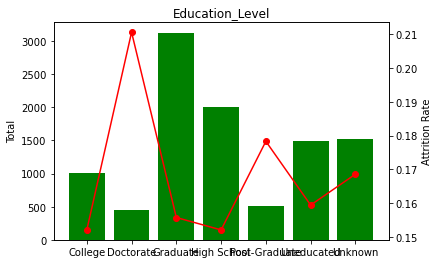

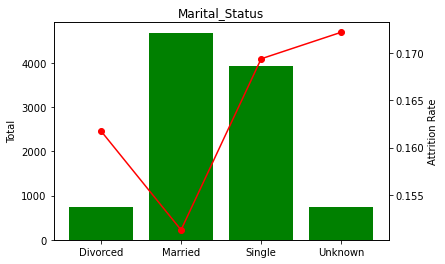

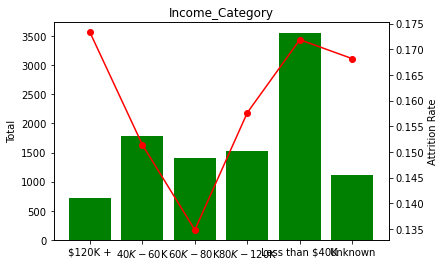

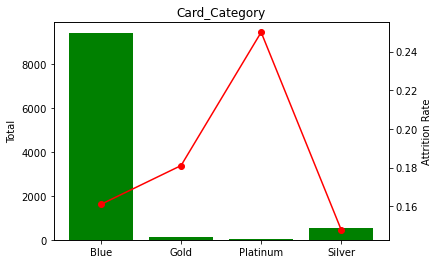

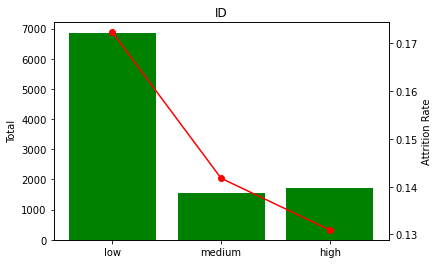

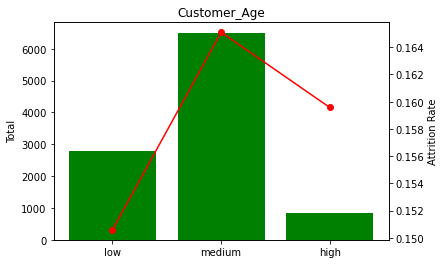

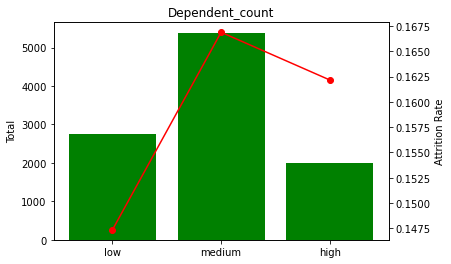

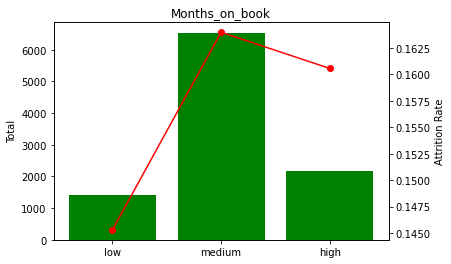

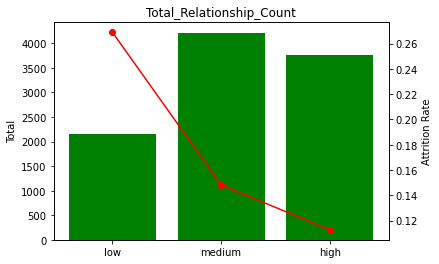

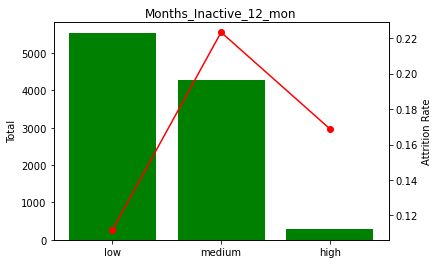

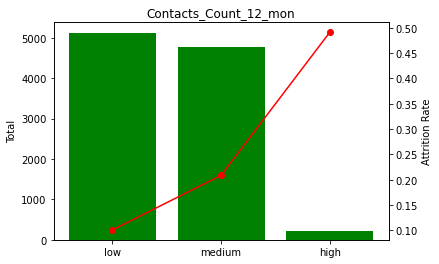

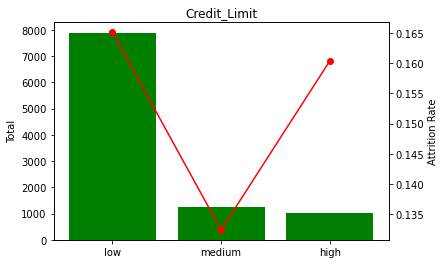

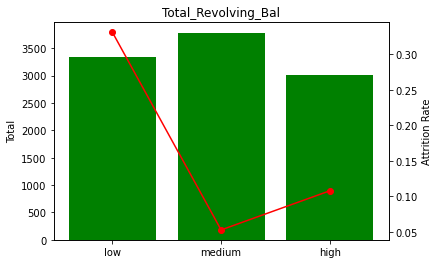

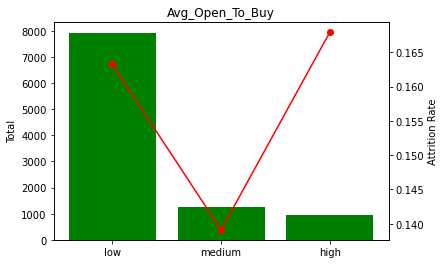

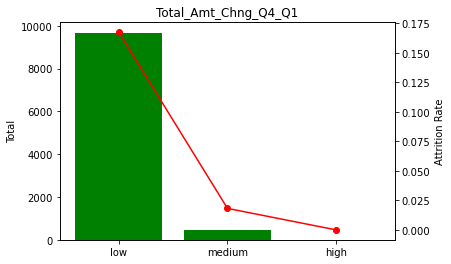

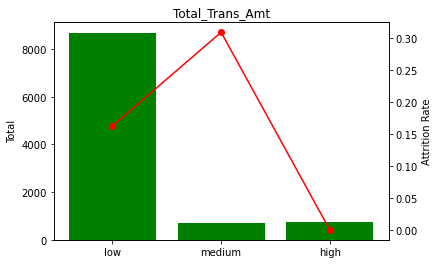

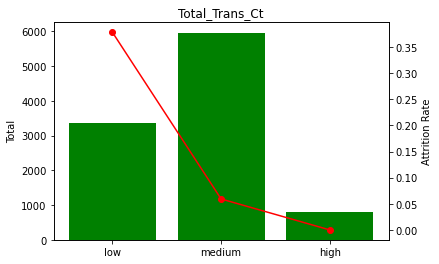

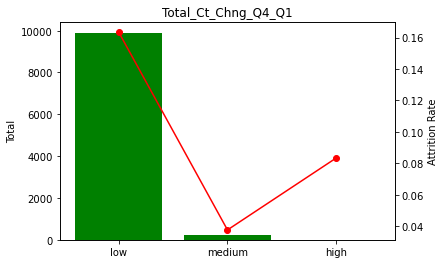

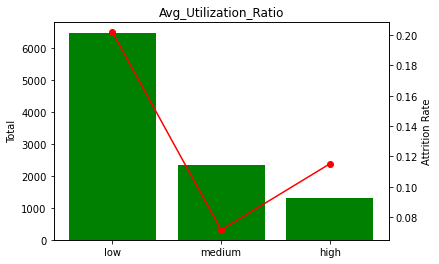

In [10]:
# define categorical columns
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

# convert numerical columns to categorical columns
num_cols = ['ID', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for col in num_cols:
    data[col] = pd.cut(data[col], bins=3, labels=['low', 'medium', 'high'])

# combine categorical columns and numerical columns
cols = categorical_cols + num_cols

# plot charts for each variable
for col in cols:
    tmp = pd.crosstab(data[col], data['Attrition_Flag'])
    tmp['Total'] = tmp.sum(axis=1)
    tmp['Attrition_Rate'] = tmp['Attrited Customer'] / tmp['Total']
    fig, ax1 = plt.subplots()
    ax1.bar(tmp.index, tmp['Total'], color='green')
    ax1.set_ylabel('Total')
    ax2 = ax1.twinx()
    ax2.plot(tmp.index, tmp['Attrition_Rate'], color='red', marker='o')
    ax2.set_ylabel('Attrition Rate')
    plt.title(col)
    plt.show()

In [11]:
# 计算相关系数
corr = data.corr()

# 绘制热力图
sns.heatmap(corr, annot=True, cmap='coolwarm')

ValueError: zero-size array to reduction operation fmin which has no identity